<a href="https://colab.research.google.com/github/gabrielpelicolla/am-fatec2025-turma2/blob/main/AulaDSM1303T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas

In [1]:
!pip install plotly --upgrade
!pip install squarify --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 32.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Carregamento do Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_credit = pd.read_csv('/content/drive/MyDrive/am5t2/am5s/credit_data.csv')
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [5]:
base_credit.info()
base_credit.isnull().sum()
base_credit.loc[base_credit['age'] < 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [6]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


## Analize de Anomalias

In [7]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

<Axes: xlabel='default', ylabel='count'>

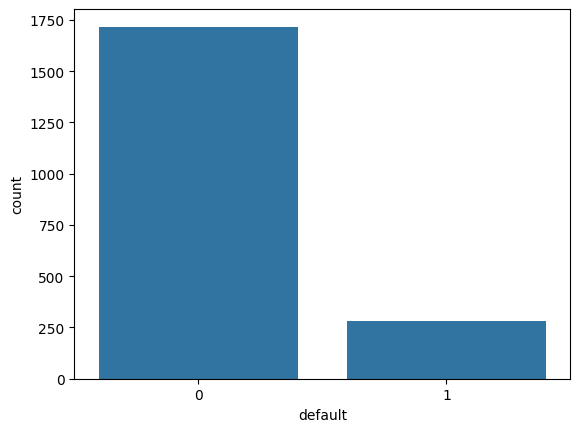

In [8]:
sns.countplot(x=base_credit['default'])

Possível anomalia pelo eixo "x" negativo.

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

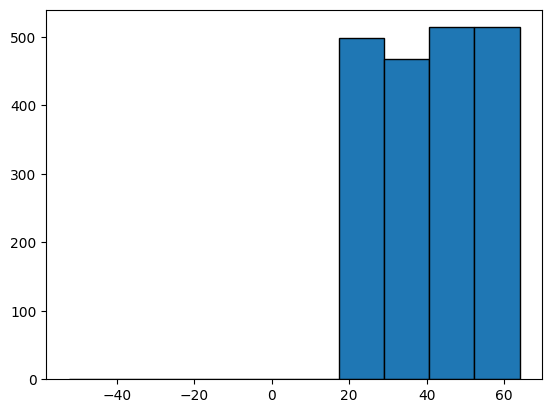

In [9]:
plt.hist(x=base_credit['age'], edgecolor='black')

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

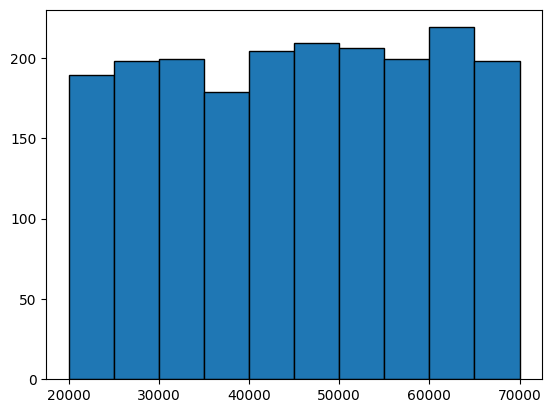

In [10]:
plt.hist(x=base_credit['income'], edgecolor='black')

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

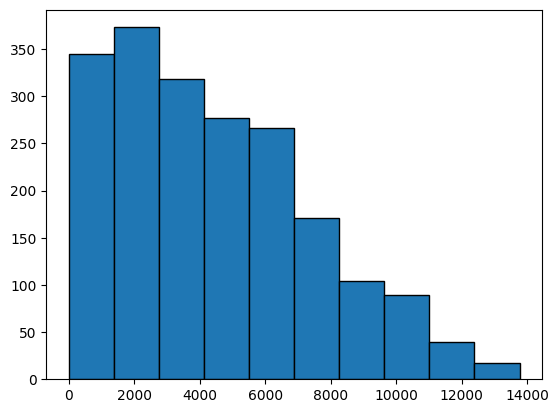

In [11]:
plt.hist(x=base_credit['loan'], edgecolor='black')

Observe as anomalias nos graficos de "age",todos tem eixos de quadrante negativo.

In [12]:
grafico_cruzado = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico_cruzado.show()

# Tratamento das Anomalias

In [13]:
base_credit.mean()

,0
clientid,1000.500000
income,45331.600018
age,40.807559
loan,4444.369695
default,0.141500


In [14]:
base_credit['age'].mean()

40.80755937840458

In [15]:
base_credit.loc[base_credit['age'] < 0, 'age'] = base_credit['age'].mean()

In [16]:
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [17]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [18]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [19]:
base_credit.loc[pd.isnull(base_credit['age']), 'age'] = base_credit['age'].mean()

#Exercícios Trabalho Gabriel D. Pelícolla

##1- Entenda a Estrutura dos Dados

### Visualize as primeiras linhas da base de dados e verifique os tipos de variáveis.

In [20]:
base_credit.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [21]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       2000 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


###Identifique valores ausentes ou inconsistentes.

In [22]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,0
loan,0
default,0


In [23]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default


In [24]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

##2- Análise Estatística Geral

###Calcule médias, medianas, desvios padrão e distribuições das principais variáveis numéricas.

In [25]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927520,4444.369695,0.141500
std,577.494589,14326.327119,13.251871,3045.410024,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,500.750000,32796.459717,29.102161,1939.708847,0.000000
50%,1000.500000,45789.117313,41.300710,3974.719419,0.000000
75%,1500.250000,57791.281668,52.582340,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


###Identifique a presença de outliers e distribuições assimétricas.

<Axes: xlabel='default', ylabel='count'>

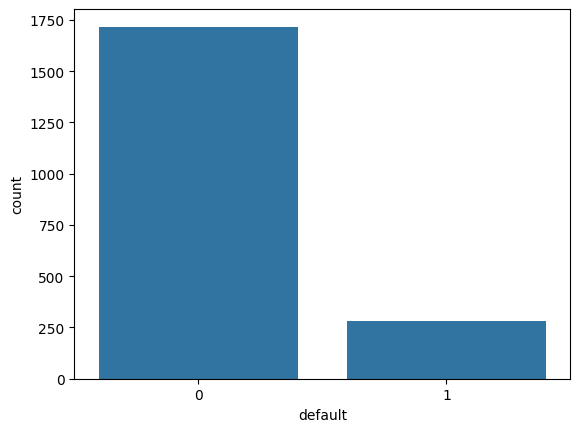

In [26]:
sns.countplot(x=base_credit['default'])

(array([202., 207., 196., 209., 173., 210., 202., 217., 196., 188.]),
 array([18.05518851, 22.64684924, 27.23850998, 31.83017071, 36.42183144,
        41.01349218, 45.60515291, 50.19681364, 54.78847438, 59.38013511,
        63.97179584]),
 <BarContainer object of 10 artists>)

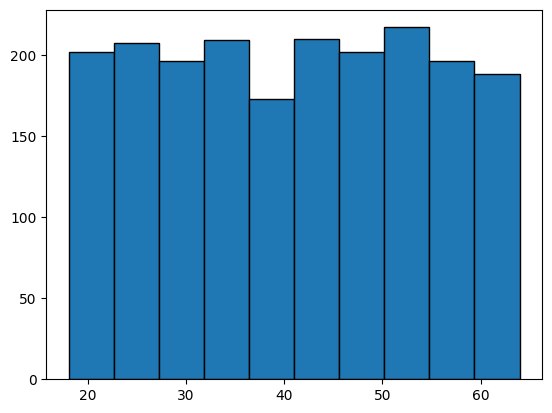

In [27]:
plt.hist(x=base_credit['age'], edgecolor='black')

(array([202., 207., 196., 209., 173., 210., 202., 217., 196., 188.]),
 array([18.05518851, 22.64684924, 27.23850998, 31.83017071, 36.42183144,
        41.01349218, 45.60515291, 50.19681364, 54.78847438, 59.38013511,
        63.97179584]),
 <BarContainer object of 10 artists>)

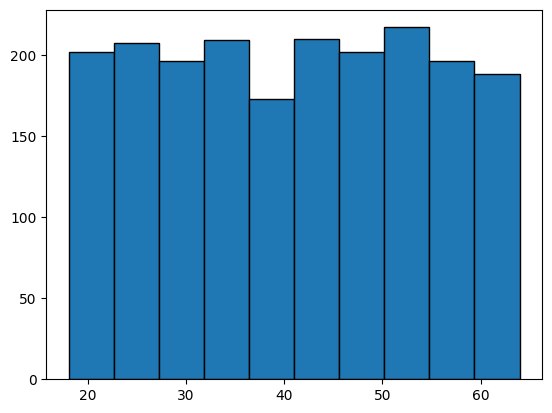

In [28]:
plt.hist(x=base_credit['age'], edgecolor='black')

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

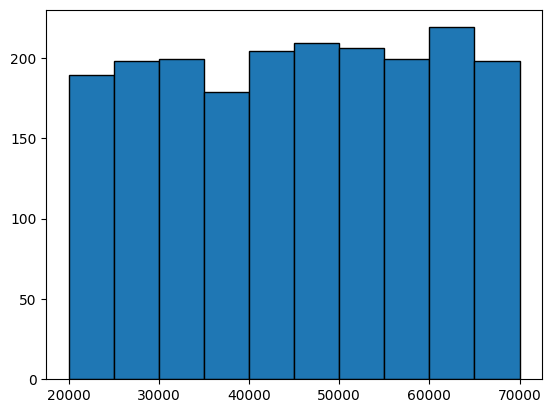

In [29]:
plt.hist(x=base_credit['income'], edgecolor='black')

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

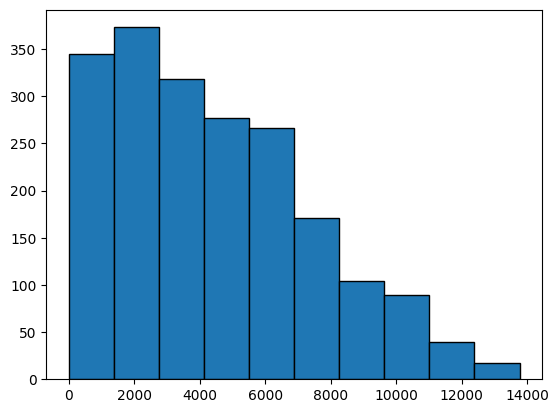

In [30]:
plt.hist(x=base_credit['loan'], edgecolor='black')

In [31]:
grafico_cruzado = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico_cruzado.show()

<Axes: xlabel='income'>

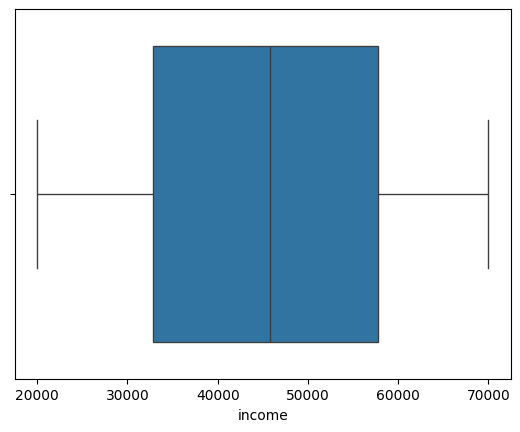

In [32]:
sns.boxplot(x=base_credit['income'])

##3- Correlação Entre Variáveis

###Utilize um mapa de calor (heatmap) para visualizar as correlações entre os atributos.

<Axes: >

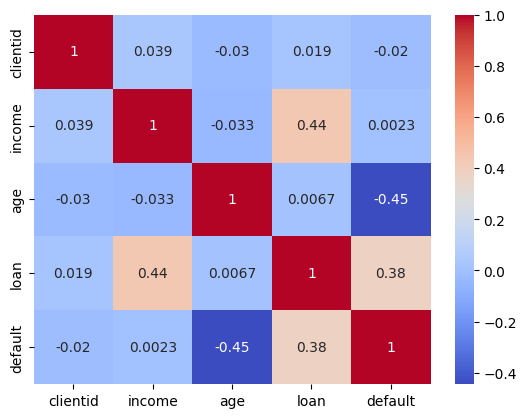

In [33]:
sns.heatmap(base_credit.corr(), cmap='coolwarm', annot=True)

###Identifique quais variáveis têm maior impacto no risco de crédito.

Os valores do atributo Default determinam o perfil de pagador do registro com base nas características dos demais atributos. Assim, ao examinar o Heat Map acima, é possível identificar a correlação entre os atributos, destacando-se Loan e Income, que apresentam os maiores níveis de correlação, com indicadores de 0,38 e 0,0023, respectivamente.

##4- Distribuição de Clientes Aprovados e Negados

###Crie gráficos de barras para visualizar a proporção de clientes aprovados e negados.

<Axes: xlabel='default', ylabel='count'>

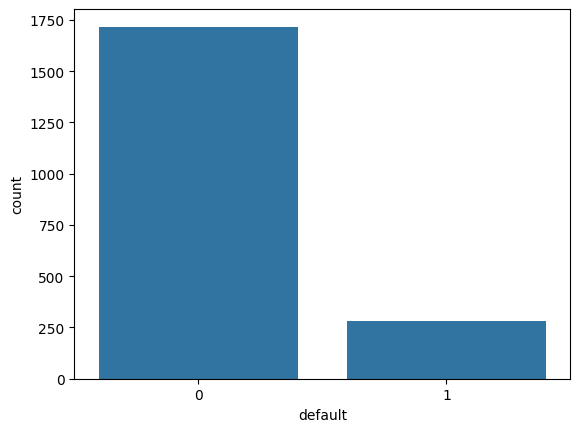

In [34]:
sns.countplot(x=base_credit['default'])

###Avalie quais fatores mais influenciam a decisão final.

In [35]:
graphic = px.scatter_matrix(base_credit, dimensions=['income', 'loan'], color='default')
graphic.show()

In [36]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'loan'], color='default')
graphic.show()

In [37]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'income'], color='default')
graphic.show()

##5- Relação entre Idade e Aprovação de Crédito

Utilize boxplots para visualizar essa relação.

<Axes: xlabel='age'>

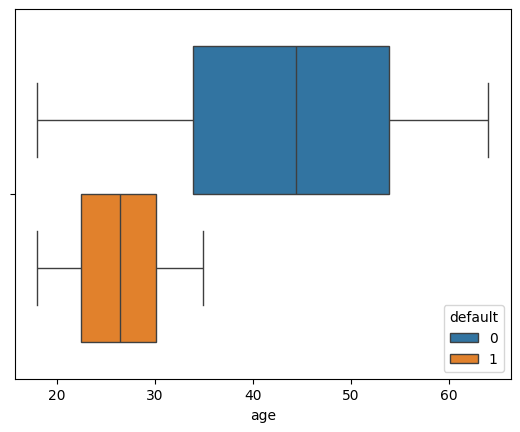

In [38]:
sns.boxplot(data=base_credit,x='age', hue='default')

##6- Impacto da Renda no Score de Crédito

###Verifique se há uma relação direta entre renda e pontuação de crédito

In [39]:
def score_calculate(income, age, loan, default):
    Indebtedness = loan / income
    score = (1000 - (11000 * Indebtedness**1.5) + (age * 1.25) - (200 * default))
    return max(min(score, 1000), 0)

In [40]:
base_credit['score'] = base_credit.apply(lambda x: score_calculate(x['income'], x['age'], x['loan'], x['default']), axis=1)

In [41]:
base_credit.head(10)

,clientid,income,age,loan,default,score
0,1,66155.925095,59.017015,8106.532131,0,601.934015
1,2,34415.153966,48.117153,6564.745018,0,143.725714
2,3,57317.170063,63.108049,8020.953296,0,503.041445
3,4,42709.534201,45.751972,6103.642260,0,462.912805
4,5,66952.688845,18.584336,8770.099235,1,301.738707
5,6,24904.064140,57.471607,15.498598,0,1000.000000
6,7,48430.359613,26.809132,5722.581981,0,586.720660
7,8,24500.141984,32.897548,2971.003310,1,376.612557
8,9,40654.892537,55.496853,4755.825280,0,629.259992
9,10,25075.872771,39.776378,1409.230371,0,903.171901


In [42]:
base_credit.describe()

,clientid,income,age,loan,default,score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927520,4444.369695,0.141500,635.858922
std,577.494589,14326.327119,13.251871,3045.410024,0.348624,321.396298
min,1.000000,20014.489470,18.055189,1.377630,0.000000,0.000000
25%,500.750000,32796.459717,29.102161,1939.708847,0.000000,353.298781
50%,1000.500000,45789.117313,41.300710,3974.719419,0.000000,707.026576
75%,1500.250000,57791.281668,52.582340,6432.410625,0.000000,934.031567
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000,1000.000000


Utilize scatter plots para representar a tendência.

In [43]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'score')
graphic.show()

<Axes: xlabel='income', ylabel='score'>

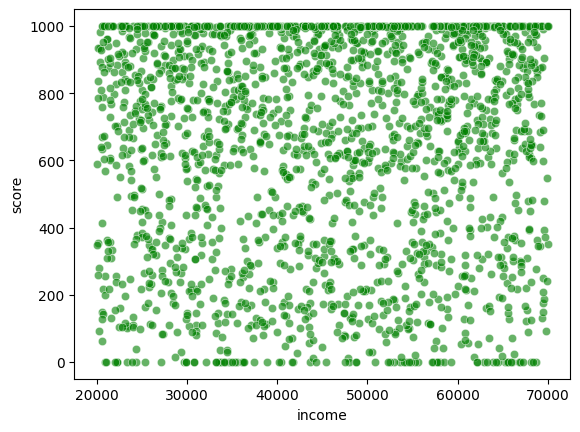

In [44]:
sns.scatterplot(x='income', y='score', data=base_credit, color='green', alpha=0.6)

##8- Tempo de Histórico de Crédito e Aprovação

###Existe um número mínimo de anos de histórico de crédito para aprovação?

<Axes: xlabel='age', ylabel='default'>

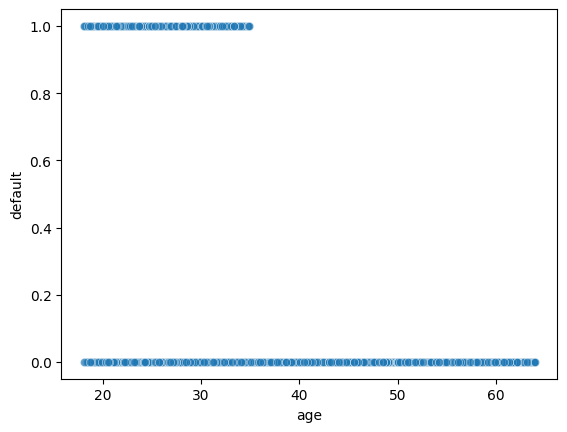

In [45]:
sns.scatterplot(x='age', y='default', data=base_credit, alpha=0.6)

###Analise essa relação usando gráficos de dispersão.

<Axes: xlabel='age', ylabel='default'>

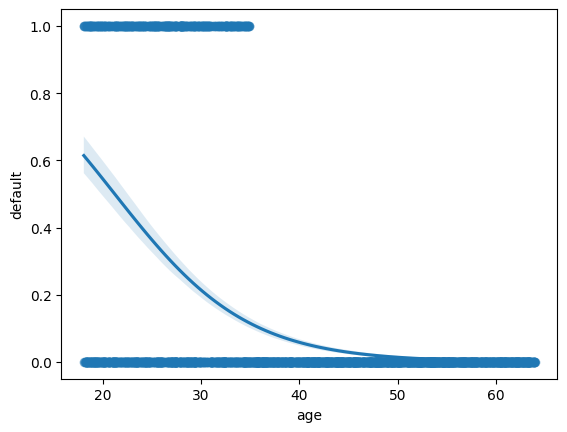

In [46]:
sns.regplot(x='age', y='default', data=base_credit, logistic=True, scatter_kws={'alpha':0.5})

##9- Endividamento e Score de Crédito

###Pessoas com maior endividamento têm pontuações de crédito mais baixas?

Utilize gráficos de dispersão e histogramas para validar essa hipótese.

In [47]:
base_credit['indebtedness'] = base_credit['loan'] / base_credit['income']

<Axes: xlabel='indebtedness', ylabel='score'>

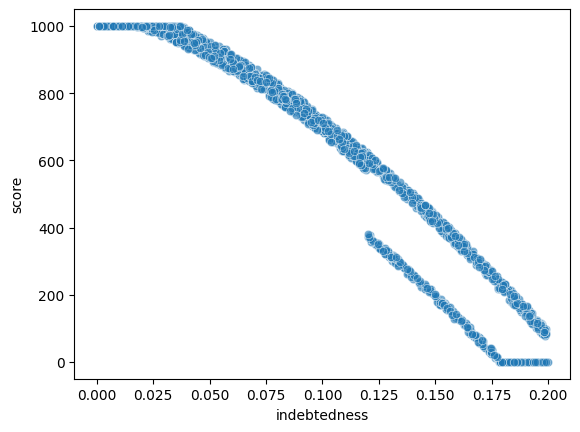

In [48]:
sns.scatterplot(x='indebtedness', y='score', data=base_credit, alpha=0.6)

In [49]:
base_credit['indebtedness_bins'] = pd.qcut(base_credit['indebtedness'], q=3, labels=['Low', 'Average', 'High'])

<Axes: xlabel='score', ylabel='Count'>

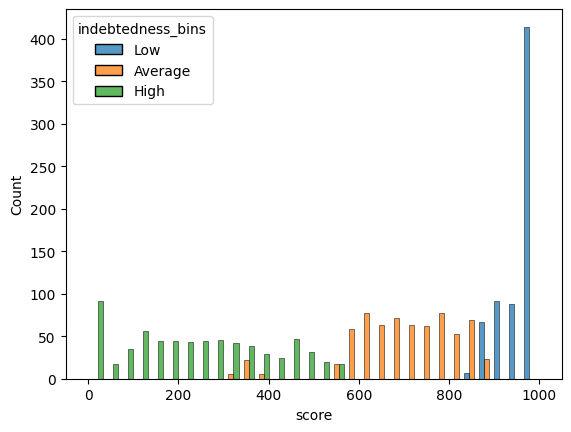

In [50]:
sns.histplot(data=base_credit, x='score', hue='indebtedness_bins', multiple='dodge', bins=30)

#Separação de Bases Analíticas

In [51]:
type(base_credit)

pandas.core.frame.DataFrame

In [54]:
x_credit = base_credit.iloc[:, 1:4].values

In [57]:
x_credit[1]

array([34415.15396582,    48.1171531 ,  6564.74501768])

In [58]:
y_credit = base_credit.iloc[:, 4].values

In [60]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [61]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [62]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [65]:
(x_credit[:,0].max() - x_credit[:,0].min()), (x_credit[:,1].max() - x_credit[:,1].min()), (x_credit[:,2].max() - x_credit[:,2].min())

(3.4896380405283276, 3.465781721201015, 4.520940024117068)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)